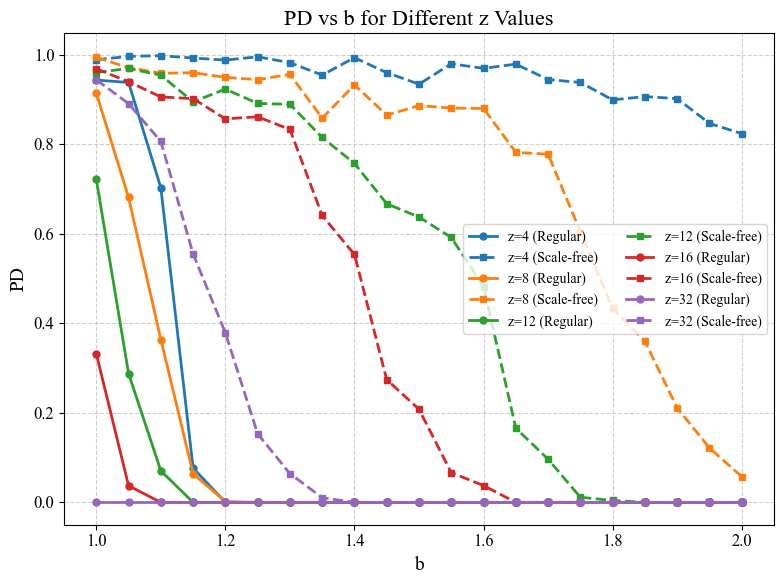

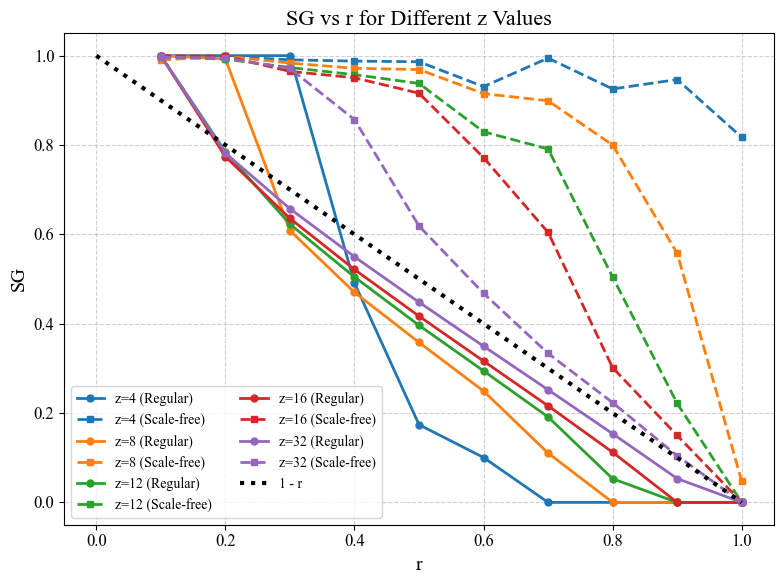

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 设置Times New Roman字体
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12

# 定义颜色方案 (使用tab10色系，共10种明显区分颜色)
colors = plt.cm.tab10(np.linspace(0, 1, 10))

# 获取所有z值
z_values = [4, 8, 12, 16, 32]

# 创建两个图形 (一个for pd, 一个for sg)
fig_pd, ax_pd = plt.subplots(figsize=(8, 6))
fig_sg, ax_sg = plt.subplots(figsize=(8, 6))

# 处理pd数据
for i, z in enumerate(z_values):
    try:
        # 读取数据
        df_pd = pd.read_csv(f'pd_results_z={z}.csv')
        
        # 绘制regular曲线
        ax_pd.plot(df_pd['b'], df_pd['regular'], 
                  color=colors[i], linestyle='-', 
                  linewidth=2, marker='o', markersize=5,
                  label=f'z={z} (Regular)')
        
        # 绘制scale-free曲线
        ax_pd.plot(df_pd['b'], df_pd['scale-free'], 
                  color=colors[i], linestyle='--', 
                  linewidth=2, marker='s', markersize=5,
                  label=f'z={z} (Scale-free)')
    except FileNotFoundError:
        print(f"Warning: pd_results_z={z}.csv not found")

# 处理sg数据
for i, z in enumerate(z_values):
    try:
        # 读取数据
        df_sg = pd.read_csv(f'sg_results_z={z}.csv')
        
        # 绘制regular曲线
        ax_sg.plot(df_sg['b'], df_sg['regular'], 
                  color=colors[i], linestyle='-', 
                  linewidth=2, marker='o', markersize=5,
                  label=f'z={z} (Regular)')
        
        # 绘制scale-free曲线
        ax_sg.plot(df_sg['b'], df_sg['scale-free'], 
                  color=colors[i], linestyle='--', 
                  linewidth=2, marker='s', markersize=5,
                  label=f'z={z} (Scale-free)')
    except FileNotFoundError:
        print(f"Warning: sg_results_z={z}.csv not found")

# 在sg图中添加 1 - b 曲线
b_values = np.linspace(0, 1, 100)  # 生成100个b值，确保曲线平滑
ax_sg.plot(b_values, 1 - b_values, 
           color='black', linestyle=':', 
           linewidth=3, label='1 - r')
# 设置PD图属性
ax_pd.set_xlabel('b', fontsize=14)
ax_pd.set_ylabel('PD', fontsize=14)
ax_pd.set_title('PD vs b for Different z Values', fontsize=16)
ax_pd.grid(True, linestyle='--', alpha=0.6)
ax_pd.legend(fontsize=10, ncol=2)  # 两列图例节省空间

# 设置SG图属性
ax_sg.set_xlabel('r', fontsize=14)
ax_sg.set_ylabel('SG', fontsize=14)
ax_sg.set_title('SG vs r for Different z Values', fontsize=16)
ax_sg.grid(True, linestyle='--', alpha=0.6)
ax_sg.legend(fontsize=10, ncol=2)  # 两列图例节省空间

# 调整布局
fig_pd.tight_layout()
fig_sg.tight_layout()

# 保存高分辨率图片 (600 dpi)
fig_pd.savefig('pd.pdf', bbox_inches='tight')
fig_sg.savefig('sg.pdf', bbox_inches='tight')

# 显示图形
plt.show()